In [41]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [42]:
y = pd.read_csv('./data/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv', sep=',')
X = pd.read_csv('./data/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv', sep=',')
building_id = X.building_id.values.tolist()
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [43]:
X = X.merge(y, on = 'building_id')
category_cols = ['count_floors_pre_eq','roof_type','foundation_type','land_surface_condition','ground_floor_type','other_floor_type','position','plan_configuration','legal_owner','ship_status']

In [44]:
X.isna().any()

building_id                               False
geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick  

In [45]:
X.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [46]:
y

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


In [47]:
X.shape

(260601, 40)

In [48]:
y.drop(['building_id'], axis = 1, inplace = True)
y = np.asarray(y)
y = y.ravel()

Text(0.5, 1.0, 'Number of Buildings of Each Damage Grade')

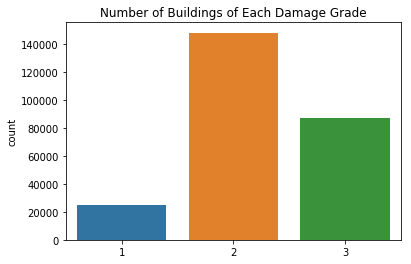

In [49]:
sns.countplot(y).set_title('Number of Buildings of Each Damage Grade')

(array([5.9738e+04, 7.4906e+04, 3.2182e+04, 4.2394e+04, 2.1269e+04,
        4.7110e+03, 9.2900e+03, 4.7350e+03, 1.9750e+03, 3.5670e+03,
        1.9320e+03, 4.1400e+02, 1.4530e+03, 1.2100e+02, 1.8000e+02,
        4.6000e+01, 1.4000e+01, 3.0000e+00, 1.4300e+02, 8.0000e+00,
        6.0000e+00, 1.2000e+01, 4.0000e+00, 2.0000e+00, 1.0600e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

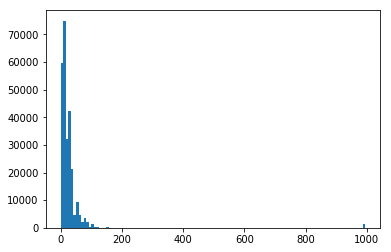

In [50]:
plt.hist(X.age, bins =120)

In [51]:
X.age.value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [52]:
unique = X.age.unique()
unique[::-1].sort()
unique

array([995, 200, 195, 190, 185, 180, 175, 170, 165, 160, 155, 150, 145,
       140, 135, 130, 125, 120, 115, 110, 105, 100,  95,  90,  85,  80,
        75,  70,  65,  60,  55,  50,  45,  40,  35,  30,  25,  20,  15,
        10,   5,   0])

Drop the outlier 995 aged building and normalize data

In [53]:
age = X.age.values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X.age = age.T

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


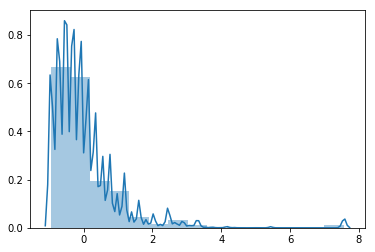

In [54]:
sns.distplot(X.age,bins = 15, kde = True)

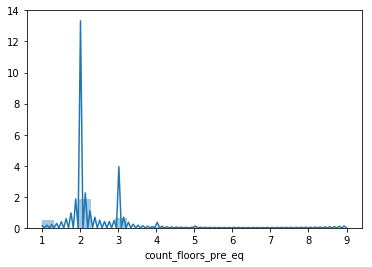

In [55]:
sns.distplot(X['count_floors_pre_eq'], bins = 25, kde = True)

In [56]:
X.count_floors_pre_eq.value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

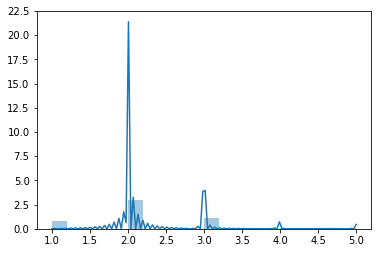

In [57]:
floors = X.count_floors_pre_eq.values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
sns.distplot(new_floors, bins = 20, kde = True)

In [58]:
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X.count_floors_pre_eq = floors.T

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


(array([2.1209e+05, 4.4021e+04, 3.4980e+03, 6.6600e+02, 1.5700e+02,
        7.9000e+01, 4.7000e+01, 2.2000e+01, 1.7000e+01, 4.0000e+00]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

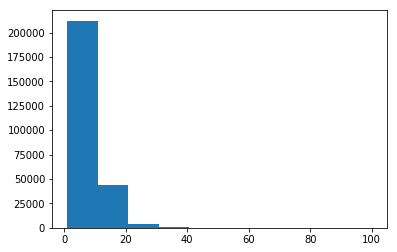

In [59]:
plt.hist(X['area_percentage'], bins = 10)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


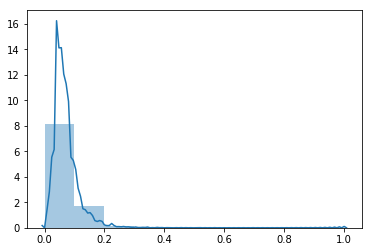

In [60]:
ap = X['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X.drop(['area_percentage'], axis = 1, inplace = True)
X.area_percentage = ap.T
sns.distplot(X.area_percentage, bins = 10)

(array([3.5262e+04, 3.7763e+04, 7.8513e+04, 4.6477e+04, 3.5465e+04,
        1.9278e+04, 4.4920e+03, 9.1700e+02, 9.0700e+02, 7.5900e+02,
        3.5800e+02, 1.7900e+02, 9.0000e+00, 7.1000e+01, 7.0000e+00,
        4.6000e+01, 0.0000e+00, 1.1000e+01, 4.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 7.6000e+01]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ,
        15.2, 16.4, 17.6, 18.8, 20. , 21.2, 22.4, 23.6, 24.8, 26. , 27.2,
        28.4, 29.6, 30.8, 32. ]),
 <a list of 25 Patch objects>)

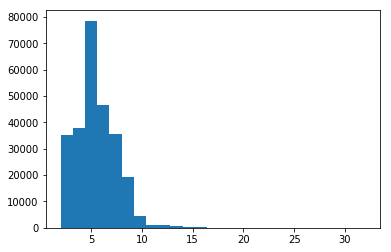

In [61]:
plt.hist(X['height_percentage'], bins = 25)

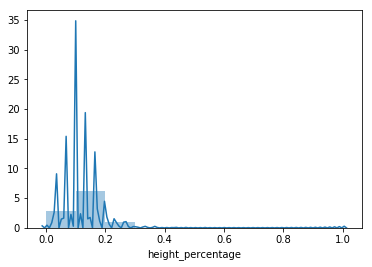

In [62]:
hp = X['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T
sns.distplot(X['height_percentage'], bins = 10)

In [63]:
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,height_percentage
0,802906,6,487,12198,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0.100000
1,28830,8,900,2812,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,0.166667
2,94947,21,363,8973,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0.100000
3,590882,22,418,10694,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,0.100000
4,201944,11,131,1488,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0.233333


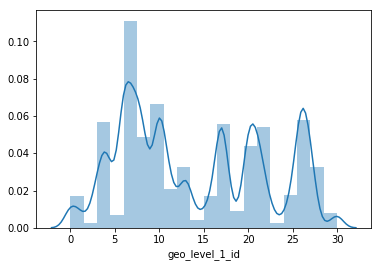

In [64]:
sns.distplot(X['geo_level_1_id'], bins = 20, kde = True)

In [65]:
cuts = pd.cut(X['geo_level_1_id'], 20)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
trans = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T

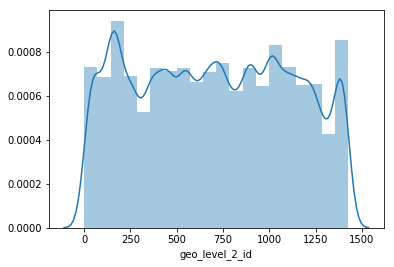

In [66]:
sns.distplot(X['geo_level_2_id'], bins = 20)

In [67]:
cuts = pd.cut(X['geo_level_2_id'], 20)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

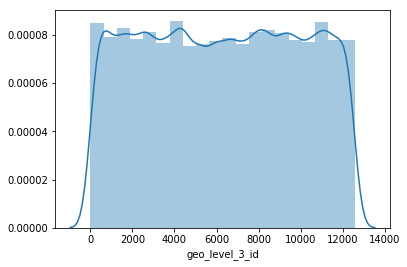

In [68]:
sns.distplot(X['geo_level_3_id'], bins = 20)

In [69]:
temp = X['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X.drop(['geo_level_3_id'], axis = 1, inplace = True)
X['geo_level_3_id'] = temp.T

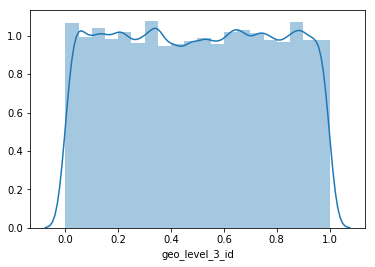

In [70]:
sns.distplot(X['geo_level_3_id'], bins = 20)

In [71]:
X.head()

,building_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,height_percentage,geo_level_1_id,geo_level_2_id,geo_level_3_id
0,802906,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0.100000,"(4.5, 6.0]",6,0.970637
1,28830,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,0.166667,"(7.5, 9.0]",12,0.223761
2,94947,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0.100000,"(19.5, 21.0]",5,0.714013
3,590882,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,0.100000,"(21.0, 22.5]",5,0.850959
4,201944,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0.233333,"(10.5, 12.0]",1,0.118405


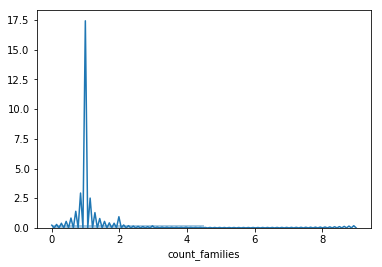

In [72]:
sns.distplot(X['count_families'], bins = 2)

In [73]:
X['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

In [74]:
cf = X['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T

In [75]:
category_cols = ['geo_level_1_id', 
                 'geo_level_2_id', 
                 'roof_type', 
                 'foundation_type', 
                 'land_surface_condition', 
                 'ground_floor_type', 
                 'other_floor_type', 
                 'position', 
                 'plan_configuration', 
                 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)

In [76]:
X.drop(['building_id','damage_grade'], axis = 1, inplace = True)
X.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,height_percentage,geo_level_3_id,count_families,"geo_level_1_id_(-0.03, 1.5]","geo_level_1_id_(1.5, 3.0]","geo_level_1_id_(3.0, 4.5]","geo_level_1_id_(4.5, 6.0]","geo_level_1_id_(6.0, 7.5]","geo_level_1_id_(7.5, 9.0]","geo_level_1_id_(9.0, 10.5]","geo_level_1_id_(10.5, 12.0]","geo_level_1_id_(12.0, 13.5]","geo_level_1_id_(13.5, 15.0]","geo_level_1_id_(15.0, 16.5]","geo_level_1_id_(16.5, 18.0]","geo_level_1_id_(18.0, 19.5]","geo_level_1_id_(19.5, 21.0]","geo_level_1_id_(21.0, 22.5]","geo_level_1_id_(22.5, 24.0]","geo_level_1_id_(24.0, 25.5]","geo_level_1_id_(25.5, 27.0]","geo_level_1_id_(27.0, 28.5]","geo_level_1_id_(28.5, 30.0]",geo_level_2_id_0,geo_level_2_id_1,geo_level_2_id_2,geo_level_2_id_3,geo_level_2_id_4,...,geo_level_2_id_8,geo_level_2_id_9,geo_level_2_id_10,geo_level_2_id_11,geo_level_2_id_12,geo_level_2_id_13,geo_level_2_id_14,geo_level_2_id_15,geo_level_2_id_16,geo_level_2_id_17,geo_level_2_id_18,geo_level_2_id_19,roof_type_n,roof_type_q,roof_type_x,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.100000,0.970637,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.166667,0.223761,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.100000,0.714013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.100000,0.850959,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.233333,0.118405,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [77]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)
xgb = RandomForestClassifier(n_estimators = 300)

In [78]:
xgb.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
y_pred = xgb.predict(X_val)

In [80]:
f1_score(y_val, y_pred, average = 'micro')

0.7085819535312062

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.49      0.55      5170
           2       0.73      0.79      0.76     29487
           3       0.69      0.63      0.66     17464

   micro avg       0.71      0.71      0.71     52121
   macro avg       0.68      0.64      0.66     52121
weighted avg       0.71      0.71      0.70     52121



In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_val)

In [ ]:
f1_score(y_val, y_pred, average = 'micro')

In [ ]:
y_pred = xgb.predict(X_train)

In [ ]:
f1_score(y_train, y_pred, average = 'micro')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
X_test = pd.read_csv('./data/Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv')

In [ ]:
building_id = X_test['building_id'].values.tolist()

In [ ]:
X_test.head()

In [ ]:
age = X_test.age.values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X_test.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X_test.age = age.T

In [ ]:
floors = X_test['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X_test.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X_test['count_floors_pre_eq'] = floors.T

In [ ]:
ap = X_test['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X_test.drop(['area_percentage'], axis = 1, inplace = True)
X_test.area_percentage = ap.T

In [ ]:
hp = X_test['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X_test.drop(['height_percentage'], axis = 1, inplace = True)
X_test['height_percentage'] = hp.T

In [ ]:
cuts = pd.cut(X_test['geo_level_1_id'], 20)
X_test.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
trans = le.fit_transform(cuts)
X_test['geo_level_1_id'] = cuts.T

In [ ]:
cuts = pd.cut(X_test['geo_level_2_id'], 20)
X_test.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X_test['geo_level_2_id'] = cuts.T

In [ ]:
temp = X_test['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X_test.drop(['geo_level_3_id'], axis = 1, inplace = True)
X_test['geo_level_3_id'] = temp.T

In [ ]:
cf = X_test['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X_test.drop(['count_families'], axis = 1, inplace = True)
X_test['count_families'] = np.array(cf_new).T

In [ ]:
category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X_test = pd.get_dummies(X_test, columns = category_cols)

In [ ]:
X_test.drop(['building_id','has_secondary_use_hotel'], axis = 1, inplace = True)
X_test.head()

In [ ]:
X_test.dtypes

In [ ]:
y_test = xgb.predict(X_test)


In [ ]:
print(len(X_test))
print(len(y_test))

In [ ]:
f1_score(y_val, y_test, average = 'micro')

In [ ]:
import numpy as np
upload = pd.DataFrame()
upload['building_id'] = np.array(building_id).T
upload['damage_grade'] = np.array(y_test).T

In [ ]:
upload

In [ ]:
upload.to_csv('upload.csv', index = False)